In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as pn
import numpy as np
from scipy.optimize import minimize

In [56]:
%matplotlib inline

# Voltage Transfer Characteristics

In [3]:
df_a = pd.read_csv("./schem/data/vtc_noninv.csv")

In [4]:
df_a = df_a.rename(columns={
    "v(V1)":"Vin",
    "v(V2)":"Vref",
    "v(Vout)":"Vout",
    "v(X1.net8)":"csrc"
                    })
df_a["Vref"] = df_a["Vref"].astype("str")

In [5]:
def gain(v, i, j):
    df_tmp = df_a[df_a.Vref==v].reset_index(drop=True).iloc[i:j].reset_index(drop=True)
    m = int((df_tmp.iloc[-1].Vout - df_tmp.iloc[0].Vout)/(df_tmp.iloc[-1].Vin - df_tmp.iloc[0].Vin))
    b = df_tmp.iloc[-1].Vout - m*df_tmp.iloc[-1].Vin
    df_plt = pd.DataFrame({
        "Vin": df_tmp.Vin,
        "Vout": m*df_tmp.Vin+b,
        "Vref": df_tmp.Vref,
        "m": m*np.ones(len(df_tmp.Vin))
    })
    df_plt["m"] = df_plt["m"].astype("str")
    return m, b, df_plt

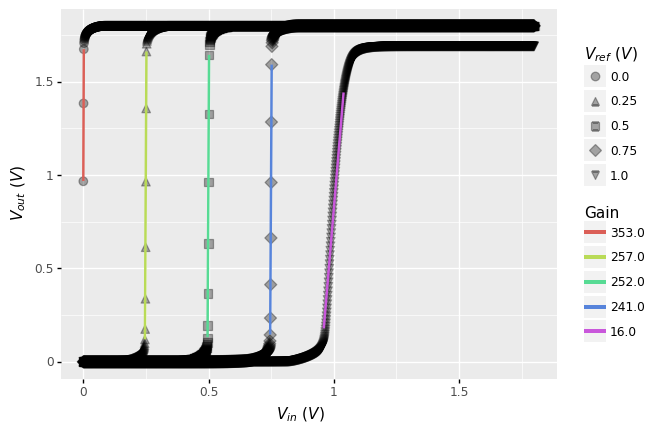

<ggplot: (8757275397458)>

In [45]:
_, _, df0_plt = gain("0.0", 0, 3)
_, _, df025_plt = gain("0.25", 246, 253)
_, _, df05_plt = gain("0.5", 496, 503)
_, _, df075_plt = gain("0.75", 746, 753)
_, _, df1_plt = gain("1.0", 960, 1040)
(
    pn.ggplot(df_a, pn.aes(x="Vin",y="Vout", shape="Vref"))
    + pn.geom_point(size=3, alpha=0.33)
#     + pn.geom_line(pn.aes(x="Vin",y="Vin"), color="b")
#     + pn.geom_line(pn.aes(x="Vin",y="Vref"), color="salmon")
    + pn.geom_line(df0_plt, pn.aes(color="m"), size=1)
    + pn.geom_line(df025_plt, pn.aes(color="m"), size=1)
    + pn.geom_line(df05_plt, pn.aes(color="m"), size=1)
    + pn.geom_line(df075_plt, pn.aes(color="m"), size=1)
    + pn.geom_line(df1_plt, pn.aes(color="m"), size=1)
    + pn.labs(
        x="$V_{in}\ (V)$",
        y="$V_{out}\ (V)$",
        shape="$V_{ref}\ (V)$", 
        color="Gain"
      )
)

The DC gain of this circuit is roughly in between 350 and 240.

# Voltage-to-Current Transfer Characteristics

In [7]:
df_b = pd.read_csv("./schem/data/v2itc_noninv.csv")
df_b = df_b.rename(columns={
    "v(V1)":"Vin",
    "v(V2)":"Vref",
    "v(Vout)":"Vout",
    "I(V3)":"Iout"
                    })
df_b["Vref"] = df_b["Vref"].astype("str")

In [8]:
def igain(i, j):
    df_tmp = df_b.iloc[i:j].reset_index(drop=True)
    m = ((df_tmp.iloc[-1].Iout - df_tmp.iloc[0].Iout)/(df_tmp.iloc[-1].Vin - df_tmp.iloc[0].Vin))
    b = df_tmp.iloc[-1].Iout - m*df_tmp.iloc[-1].Vin
    df_plt = pd.DataFrame({
        "Vin": df_tmp.Vin,
        "Iout": m*df_tmp.Vin+b,
        "Vref": df_tmp.Vref,
        "m": m*np.ones(len(df_tmp.Vin))
    })
    df_plt["m"] = df_plt["m"].astype("str")
    return m, b, df_plt

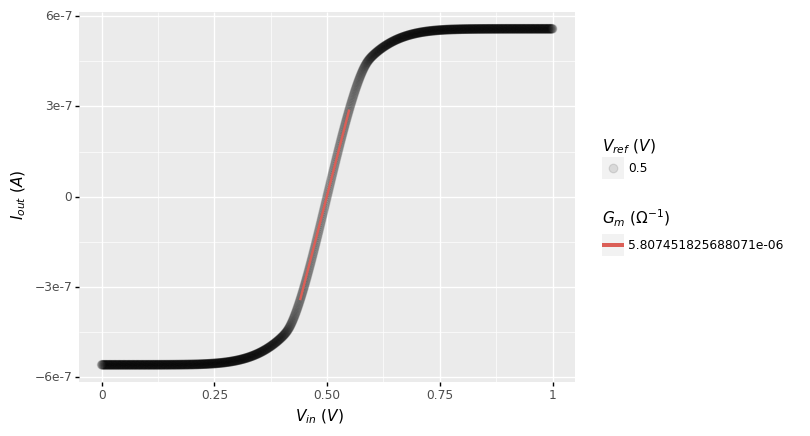

<ggplot: (8757275261299)>

In [117]:
m, _, dfb_gain = igain(440, 550)
(
    pn.ggplot(df_b, pn.aes(x="Vin",y="Iout", shape="Vref"))
    + pn.geom_point(size=3, alpha=0.1)
    + pn.geom_line(dfb_gain, pn.aes(color="m"), size=1)
    + pn.labs(
        x="$V_{in}\ (V)$",
        y="$I_{out}\ (A)$",
        shape="$V_{ref}\ (V)$", 
        color="$G_m\ (\Omega^{-1})$\n"
      )
)

The incremental transconductance gain of the circuit, $G_m$, is roughly $5.81\times10^{-6} \Omega^{-1}$. The limiting value of the current is roughly $\pm5.58\times10^{-7}\ A$ .

# Loopgain

In [54]:
df_c = pd.read_csv("./schem/data/loopgain_noninv.csv")

In [46]:
df_c.iloc[0]

frequency     1.000000
Tmag         48.655403
Tphase       -0.032994
Name: 0, dtype: float64

In [47]:
10**(4.8/2)

251.18864315095797

In [48]:
df_csort= df_c
df_csort["Tmag"]=abs(df_csort["Tmag"])
df_csort.sort_values("Tmag")

,frequency,Tmag,Tphase
113,4.466836e+05,0.444998,-92.524984
114,5.011872e+05,0.556461,-92.884368
112,3.981072e+05,1.446151,-92.199061
115,5.623413e+05,1.558305,-93.281962
111,3.548134e+05,2.447059,-91.902285
...,...,...,...
206,1.995262e+10,74.680655,-359.519020
208,2.511886e+10,74.681201,-359.695304
207,2.238721e+10,74.681222,-359.610403
239,8.912509e+11,74.684153,-393.643956


In [51]:
m_x = (-0.556461 - 0.444998)/(5.011872e5-4.466836e5)
b_x = -0.556461-m_x*5.011872e5
freq_x = -b_x/m_x
freq_x

470902.25797082053

Text(0, 0.5, 'Phase (deg)')

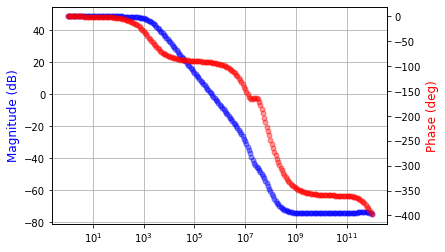

In [57]:
fig, ax = plt.subplots()

c1 = "b"
ax.semilogx(df_c.frequency, df_c.Tmag, "o", color=c1, alpha=0.4, markersize=5)
ax.set_ylabel("Magnitude (dB)", size=12, color=c1)
ax.grid()

ax2 = ax.twinx()
c2 = "r"
ax2.semilogx(df_c.frequency, df_c.Tphase, "o", color=c2, alpha=0.4, markersize=5)
ax2.set_ylabel("Phase (deg)", size=12, color=c2)

At low frequencies, the loopgain of the folded cascode differential amplifier is 48dB, which translate to
$$Gain=10^{4.8/2}\approx251$$
It is very similar to most of the DC gains that we extracted in the first part of the simulation. The unity-gain crossover frequency is roughly $4.7092\times10^{5}\ Hz$.

Theoretically, the time constant of the circuit is given by
$$ \tau = \frac{C}{G_m}=\frac{2\times10^{-12} F}{5.81\times10^{-6} \Omega^{-1}}$$
and the cutoff frequency is given by
$$f_c = \frac{1}{2\pi\tau}=4.62345\times10^{5}\ Hz$$
which closely resembles what we have extracted from the simulation data.

In [120]:
1/(2*np.pi*(2e-12/5.81e-6))

462345.109681956

# Unity-Gain Follower Frequency Response

In [58]:
df_d = pd.read_csv("./schem/data/ac_noninv.csv")

In [96]:
def freq_cutoff(df, i, j):
    df_tmp = df.iloc[int(i):int(j)].reset_index(drop=True)
    df_tmp["frequency"] = np.log10(df_tmp["frequency"])
    m = (df_tmp.iloc[-1].tmag - df_tmp.iloc[0].tmag)/(df_tmp.iloc[-1].frequency - df_tmp.iloc[0].frequency)
    b = df_tmp.iloc[-1].tmag - m*df_tmp.iloc[-1].frequency
    df_plt = pd.DataFrame({
        "frequency": df_tmp.frequency,
        "tmag": m*df_tmp.frequency+b,
        "m": m*np.ones(len(df_tmp.frequency))
    })
    df_plt["m"] = df_plt["m"].astype("str")
    return m, b, df_plt

In [97]:
m, b, df_freqroll = freq_cutoff(df_d, 120, 130)

In [104]:
10**(-b/m)

416959.66847466904

Text(0, 0.5, 'Phase (deg)')

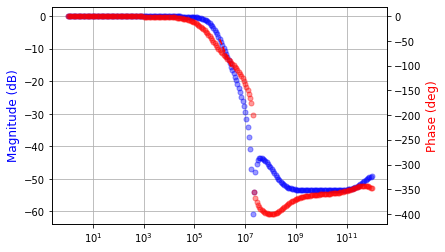

In [109]:
fig, ax = plt.subplots()

c1 = "b"
ax.semilogx(df_d.frequency, df_d.tmag, "o", color=c1, alpha=0.4, markersize=5)
ax.semilogx(10**df_freqroll.frequency, df_freqroll.tmag, "r--")
ax.set_ylabel("Magnitude (dB)", size=12, color=c1)
ax.grid()

ax2 = ax.twinx()
c2 = "r"
ax2.semilogx(df_d.frequency, df_d.tphase, "o", color=c2, alpha=0.4, markersize=5)
ax2.set_ylabel("Phase (deg)", size=12, color=c2)

From fitting a straight line near the initial rolloff, I believe the corner frequency in the circuit's frequency response is roughly $4.16960\times10^{5}\ Hz$, which makes it veyr similar to the crossover frequency in the loopgain simulation.

# Small Signal


In [33]:
df_e = pd.read_csv("./schem/data/trans_ssig.csv").rename(columns={
    "v(V1)":"Vin",
    "v(Vout)":"Vout"})

In [30]:
def exp_plot_r(X):
    return 0.01*(1 - np.exp(-df_e.time.values/X[0]))

def exp_plot_f(X):
    return 0.01*np.exp(-df_e.time.values/X[0])

def find_tau_r(df):
    df_tmp = df
    res = [j - i for i, j in zip(df_tmp.Vout[: -1], df_tmp.Vout[1 :])]
    df_tmp["d"] = np.array([0.0]+res)
    df_tmp["Vout"] = df_tmp["Vout"]-df_tmp.iloc[0].Vout
    df_tmp = df_tmp[df_tmp.d>0].reset_index(drop=True)
    t_off = df_tmp.iloc[0].time
    df_tmp["time"] = df_tmp["time"]-t_off
    
    df_res = df_tmp[df_tmp.Vout>0.01*(1-np.exp(-1))].reset_index(drop=True)
    
    return t_off, df_res.iloc[0].time#t_off, res_fit

def find_tau_f(df):
    df_tmp = df
    res = [j - i for i, j in zip(df_tmp.Vout[: -1], df_tmp.Vout[1 :])]
    df_tmp["d"] = np.array([0.0]+res)
    df_tmp["Vout"] = df_tmp["Vout"]-df_tmp.iloc[0].Vout
    df_tmp = df_tmp[df_tmp.time>2e-6].reset_index(drop=True)
    df_tmp = df_tmp[df_tmp.d<0].reset_index(drop=True)
    t_off = df_tmp.iloc[0].time
    df_tmp["time"] = df_tmp["time"]-t_off
    
    df_res = df_tmp[df_tmp.Vout<0.01*(np.exp(-1))].reset_index(drop=True)
    
    return t_off, df_res.iloc[0].time

In [31]:
t_off_r, tau_r = find_tau_r(df_e)
t_off_f, tau_f = find_tau_f(df_e)

<IPython.core.display.Javascript object>


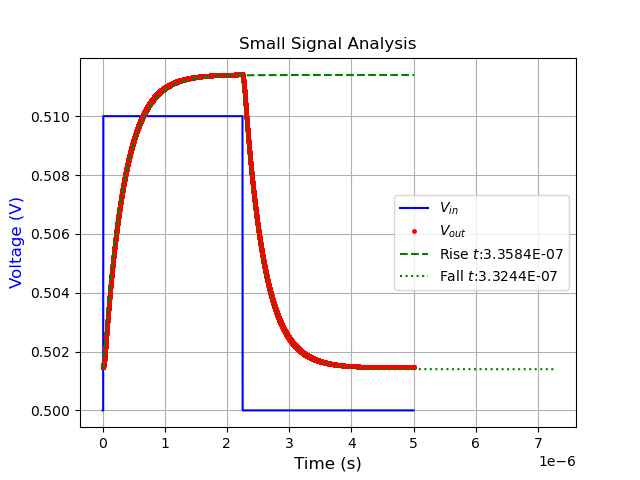

In [35]:
fig, ax = plt.subplots()

c1 = "b"
ax.plot(df_e.time, df_e.Vin, "-", color=c1, alpha=1, markersize=5, label="$V_{in}$")
ax.plot(df_e.time, df_e.Vout, ".", color="r", alpha=1, markersize=5, label="$V_{out}$")
ax.plot(df_e.time+t_off_r, exp_plot_r([tau_r])+0.5014, "--", color="g", alpha=1, markersize=5, label="Rise $t$:%.4E"%tau_r)
ax.plot(df_e.time+t_off_f, exp_plot_f([tau_f])+0.5014, ":", color="g", alpha=1, markersize=5, label="Fall $t$:%.4E"%tau_f)
ax.set_ylabel("Voltage (V)", size=12, color=c1)
ax.set_xlabel("Time (s)", size=12)
ax.set_title("Small Signal Analysis")
ax.grid()
ax.legend()

In [113]:
1/(2*np.pi*tau_r), 1/(2*np.pi*tau_f)

(473901.09305590566, 478747.87357687176)

The input step needs to be small enough that the output current of the folded-cascode differential amplifier is not near its limiting value. (Referencing the figure in the voltage-to-current transfer characteristics.) The chosen step of 0.01V is small enough that it does not go near the limiting current value.

The response is not exactly symmetrical. The rise time constant is longer by something on the order of $10^{-9}$ second.

The natural frequency after being converted from their corresponding time constants with the following equation, is $4.74\times10^5\ Hz$ for the rise and $4.79\times10^5\ Hz$ for the fall. They closely resemble the cutoff frequency in the frequency sweep and the crossover frequency in the loopgain simulation.

$$f_c = \frac{1}{2\pi\tau}$$

# Large Signal

In [18]:
df_f = pd.read_csv("./schem/data/trans_lsig.csv").rename(columns={
    "v(V1)":"Vin",
    "v(Vout)":"Vout"})

In [19]:
def slew(df, i, j):
    df_tmp = df.iloc[int(i):int(j)].reset_index(drop=True)
    m = (df_tmp.iloc[-1].Vout - df_tmp.iloc[0].Vout)/(df_tmp.iloc[-1].time - df_tmp.iloc[0].time)
    b = df_tmp.iloc[-1].Vout - m*df_tmp.iloc[-1].time
    df_plt = pd.DataFrame({
        "time": df_tmp.time,
        "Vout": m*df_tmp.time+b,
        "m": m*np.ones(len(df_tmp.Vin))
    })
    df_plt["m"] = df_plt["m"].astype("str")
    return m, b, df_plt

In [20]:
m_r,_,slew_r = slew(df_f, 500, 30000)
m_f,_,slew_f = slew(df_f, 22.7e4, 26e4)

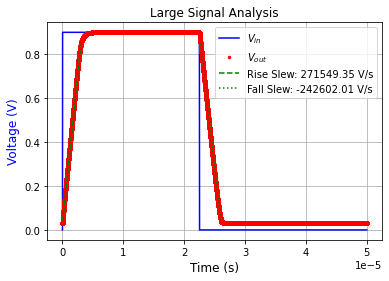

In [114]:
fig, ax = plt.subplots()

c1 = "b"
ax.plot(df_f.time, df_f.Vin, "-", color=c1, alpha=1, markersize=5, label="$V_{in}$")
ax.plot(df_f.time, df_f.Vout, ".", color="r", alpha=1, markersize=5, label="$V_{out}$")
ax.plot(slew_r.time, slew_r.Vout, "--", color="g", alpha=1, markersize=5, label="Rise Slew: %.2f V/s"%m_r)
ax.plot(slew_f.time, slew_f.Vout, ":", color="g", alpha=1, markersize=5, label="Fall Slew: %.2f V/s"%m_f)
ax.set_ylabel("Voltage (V)", size=12, color=c1)
ax.set_xlabel("Time (s)", size=12)
ax.set_title("Large Signal Analysis")
ax.grid()
ax.legend()

The response of the circuit to the large-amplitude steps is not exactly symmetrical. The rise slew rate is slightly larger in magnitude than the fall slew rate.

The slew rate calculated from the below equation is $2.79\times10^{5}\ V/s$.
    $$\frac{I_{limit}}{C_{load}}\approx\frac{5.58\times10^{-7}\ A}{2\times10^{-12}\ F}=279000\ V/s$$
which is very close to the value that we have extracted from the large signal analysis of the response.

In [40]:
5.58e-7/2e-12

279000.0